In [36]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.style.use("ggplot")



In [37]:
# 2. Load the Dataset
df = pd.read_csv('https://github.com/Mukesh140206/Analysing-Crime-trends/raw/main/Phase_3/US_Crime_Data_10105Rows.csv')

In [38]:
# 3. Parse Dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Updated On'] = pd.to_datetime(df['Updated On'], errors='coerce')

In [39]:
# 4. Extract Time Features
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['hour'] = df['Date'].dt.hour
df['weekday'] = df['Date'].dt.day_name()

In [40]:
# 5. Basic Cleanup
df.dropna(subset=['Date', 'Primary Type'], inplace=True)
print("Shape after drop:", df.shape)

Shape after drop: (10104, 27)


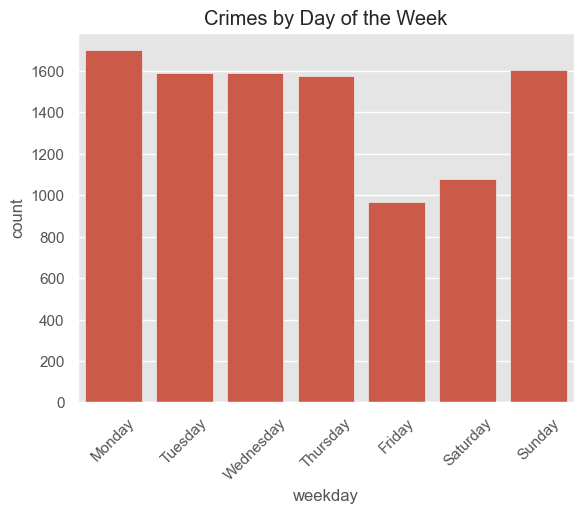

In [43]:
# =======================
# 🟢 TIME-BASED ANALYSIS
# =======================

# 8. Crimes by Day of Week
sns.countplot(data=df, x='weekday', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Crimes by Day of the Week")
plt.xticks(rotation=45)
plt.show()



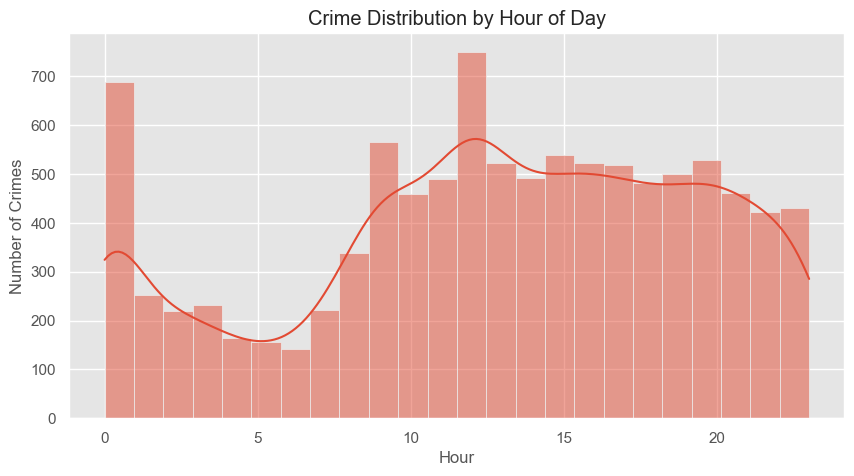

In [44]:
# 9. Hourly Crime Pattern
plt.figure(figsize=(10, 5))
sns.histplot(df['hour'], bins=24, kde=True)
plt.title("Crime Distribution by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Crimes")
plt.show()



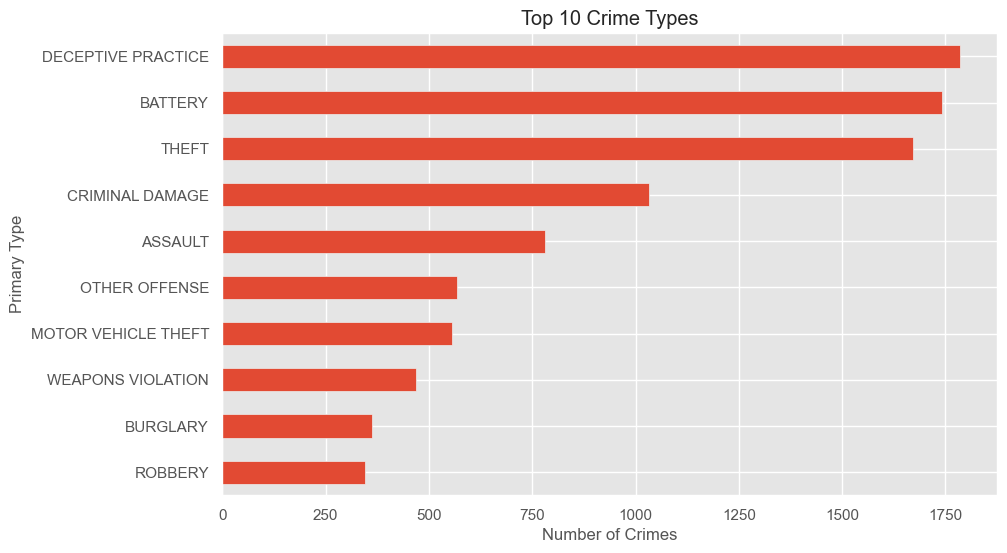

In [45]:
# =======================
# 🔴 CATEGORICAL ANALYSIS
# =======================

# 10. Top 10 Crime Types
top_types = df['Primary Type'].value_counts().head(10)
top_types.plot(kind='barh', figsize=(10, 6), title="Top 10 Crime Types")
plt.xlabel("Number of Crimes")
plt.gca().invert_yaxis()
plt.show()


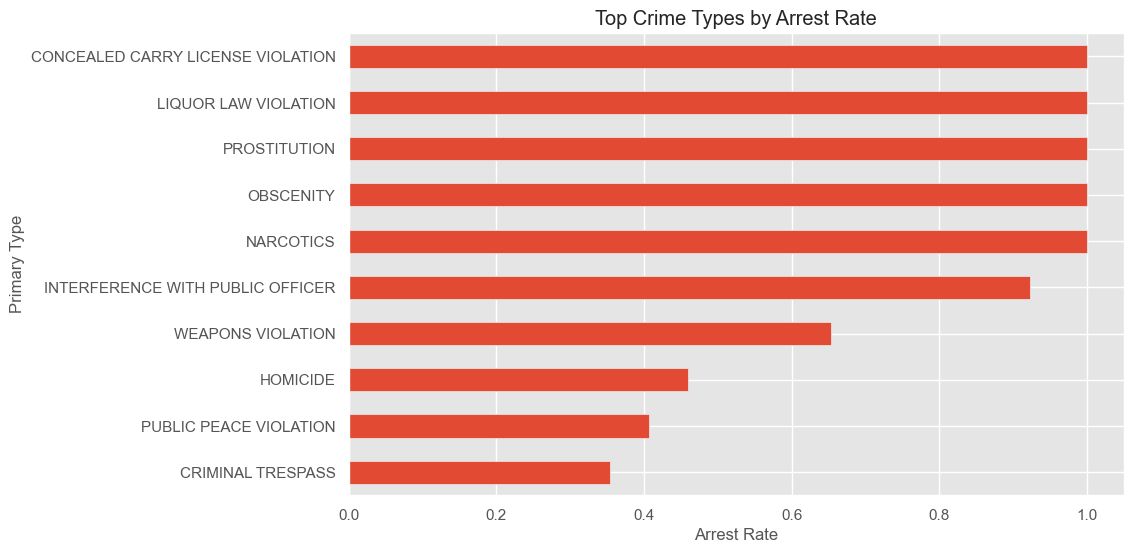

In [46]:

# 11. Arrest Rate by Crime Type
arrest_rate = df.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False).head(10)
arrest_rate.plot(kind='barh', title="Top Crime Types by Arrest Rate", figsize=(10, 6))
plt.xlabel("Arrest Rate")
plt.gca().invert_yaxis()
plt.show()


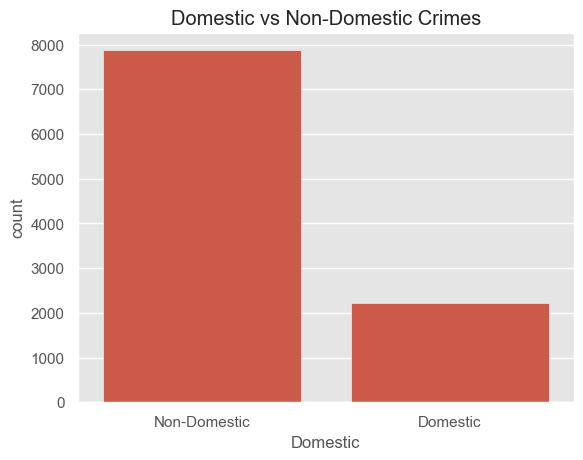

In [47]:

# 12. Domestic vs Non-Domestic Crimes
sns.countplot(data=df, x='Domestic')
plt.title("Domestic vs Non-Domestic Crimes")
plt.xticks([0, 1], ['Non-Domestic', 'Domestic'])
plt.show()


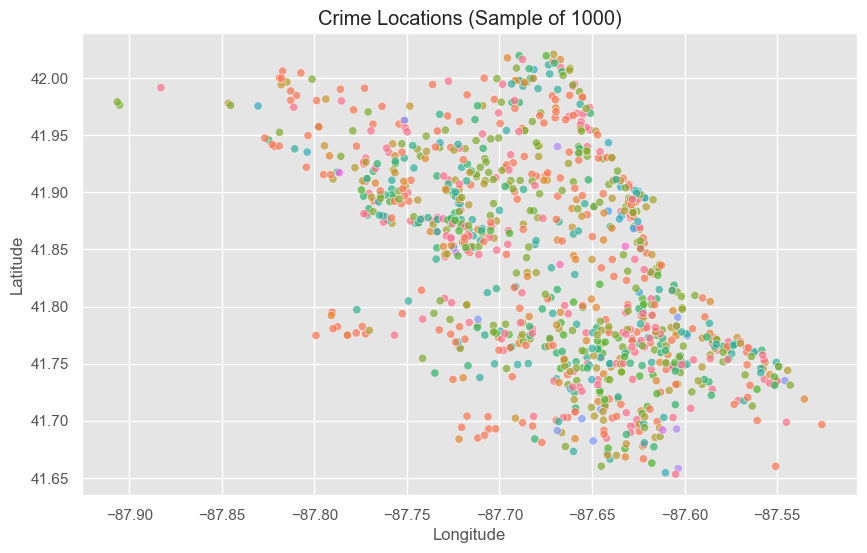

In [48]:

# =======================
# 🟣 GEO-SPATIAL INSIGHTS
# =======================

# 13. Scatterplot of Crime Locations (if Latitude & Longitude are valid)
plt.figure(figsize=(10, 6))
sample = df.dropna(subset=['Latitude', 'Longitude']).sample(1000, random_state=1)
sns.scatterplot(data=sample, x='Longitude', y='Latitude', hue='Primary Type', alpha=0.7, legend=False)
plt.title("Crime Locations (Sample of 1000)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()



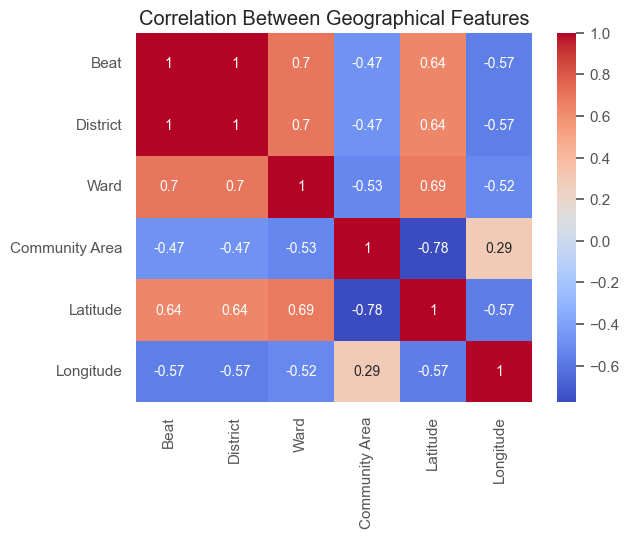

In [49]:
# Optional: Heatmap style can be added using folium or plotly

# =======================
# Optional Correlation Analysis
# =======================
num_cols = ['Beat', 'District', 'Ward', 'Community Area', 'Latitude', 'Longitude']
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Geographical Features")
plt.show()